# Natural Language Processing
**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way. 


**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject. 
![Sentiment Analysis](https://media-exp1.licdn.com/dms/image/C4D12AQHPAZFZZxBtng/article-cover_image-shrink_600_2000/0?e=1593648000&v=beta&t=eQAR5WOihE2_ZCCAJbsgNyJlaI_GW7u8lDw45zGbfuU)
> Sentiment Classification is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook. 
![Sentiment Analysis](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg)
Let's get started with code without furthur ado.

<font color='red'> If you find this notebook helpful, please leave a UPVOTE to encourage me</font>

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

Tensorflow Version 1.14.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  Dataset Preprocessing
In this notebook, I am using **Sentiment-140** from [Kaggle](https://www.kaggle.com/kazanova/sentiment140). It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [2]:
df = pd.read_csv('All_News.csv')
df = df.dropna()
df = df.reset_index()
df.head()

,index,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
0,0,19 04 2013,PM directs early completion of projects in Bal...,1,1,0.0,0.884,0.116,0.5267,1
1,1,19 04 2013,RECORDER REPORT: KSE mid day update - KARACHI:...,1,1,0.0,0.874,0.126,0.5574,1
2,2,21 04 2013,Most kitchen items become dearer - ABDUL RASHE...,1,1,0.0,0.720,0.280,0.7184,1
3,3,21 04 2013,Wattoo demands security as per entitlement to ...,1,1,0.0,0.918,0.082,0.3400,1
4,4,22 04 2013,SC directs FIA to investigate awarding of lice...,1,1,0.0,0.806,0.194,0.7579,1


You can see the columns are without any proper names. Lets rename them for our reference

We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns.

In [3]:
df.describe()

,index,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000
mean,5257.000000,0.167000,0.167000,0.076030,0.830364,0.093605,0.087019,0.167000
std,3035.563374,0.799274,0.799274,0.124271,0.140714,0.109041,0.501812,0.799274
min,0.000000,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,2628.500000,0.000000,0.000000,0.000000,0.750000,0.000000,-0.296000,0.000000
50%,5257.000000,0.000000,0.000000,0.000000,0.845000,0.071000,0.000000,0.000000
75%,7885.500000,1.000000,1.000000,0.128000,0.934000,0.161000,0.510600,1.000000
max,10514.000000,1.000000,1.000000,0.821000,1.000000,0.773000,0.973200,1.000000


In [4]:
df['Polarity'].value_counts()


 1    4383
 0    3505
-1    2627
Name: Polarity, dtype: int64

Here are decoding the labels. We map **0 -> Negative and 1 -> Positive** as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution. Because it's important that we have almost small amount of examples for given classes.

Positive: 4383 , Negative: 2627 , Neutral: 3505


Text(0.5, 1.0, 'Sentiment Data Distribution')

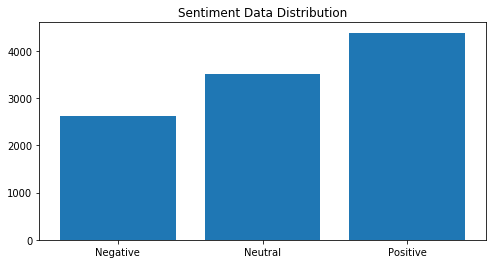

In [5]:
plt.figure(figsize=(8,4))
count_pos = df['Polarity'].value_counts()[1]
count_ntl = df['Polarity'].value_counts()[0]
count_neg = df['Polarity'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness. Thank Goodness.

Now let us explore the data we having here... 

In [6]:
import random
random_idx_list = [random.randint(1,len(df)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,index,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
7934,7934,12 07 2018,What can help us out of the mess we're in?,0,0,0.189,0.606,0.205,0.0516,0
8034,8034,25 09 2015,‘Bullish’ trend at cattle market just ahead of...,0,0,0.000,1.000,0.000,0.0000,0
5892,5892,24 01 2015,"Two more suspects, linked with IS, held",-1,-1,0.310,0.690,0.000,-0.4005,-1
4598,4598,15 04 2020,Punjab to soon increase coronavirus testing ca...,1,1,0.000,0.922,0.078,0.3182,1
5737,5737,26 02 2014,Three militants arrested in Swabi,-1,-1,0.437,0.563,0.000,-0.4767,-1
2046,2046,25 01 2018,Mauritius business confidence jumps to its hig...,1,1,0.000,0.815,0.185,0.7650,1
1190,1190,28 06 2016,CJ advises LHC staff to work with commitment -...,1,1,0.000,0.751,0.249,0.8225,1
4071,4071,11 02 2020,Modi has committed 'Himalayan blunder': Punjab...,-1,-1,0.143,0.787,0.070,-0.5423,-1
7066,7066,10 01 2016,AJK govt opposes moves to convert GB into prov...,0,0,0.000,1.000,0.000,0.0000,0
464,464,18 11 2014,SC disposes of petitions seeking PM's disquali...,1,1,0.000,0.859,0.141,0.5574,1


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

# Text Preprocessing
Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue
![Data Science Meme](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @arunrk7, @andrewng
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)

That looks like a tedious process, isn't?. Don't worry there is always some library in Python to do almost any work. The world is great!!!

**NLTK** is a python library which got functions to perform text processing task for NLP.



In [7]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [8]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
df.text = df['News'].apply(lambda x: preprocess(x))

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


**Aaww.. It is clean and tidy now. Now let's see some word cloud visualizations of it.**

### Positive Words

In [10]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[0:count_pos+4])
text = ' '.join(temp["News"][0:count_pos])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

      index        Date                                               News  \
0         0  19 04 2013  PM directs early completion of projects in Bal...   
3864   3864  19 12 2019  KMDC Alumni Conference to be held on December ...   
3862   3862  19 12 2019  Millennial Olympiad begins at TMUC - The Mille...   
3861   3861  19 12 2019  IoBM signs MoU with SWVL - The Institute of Bu...   
3860   3860  19 12 2019  Bhandara wishes Christians Happy Christmas - T...   
...     ...         ...                                                ...   
1841   1841  19 10 2017  Japan trade surplus expands strongly in Septem...   
8179   8179  09 11 2013  Allama Iqbal was free from prejudice: Altaf Hu...   
8177   8177  10 09 2020  '48pc petrol pumps' measurement scale tempered...   
8284   8284  16 02 2015  US port strike pushes up freight rates with sh...   
8285   8285  07 12 2015  Brazil's November inflation seen at 12-year hi...   

      Polarity  Sentiment    neg    neu    pos  compound  Cum  

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

### Neutral Words

In [ ]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos:count_pos + count_ntl])
text = ' '.join(temp["News"][count_pos:count_pos + count_ntl])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

In [ ]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos + count_ntl:])
text = ' '.join(temp["News"][count_pos + count_ntl:])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

In [11]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 100

In [12]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))
print(test_data)

Train Data size: 8412
Test Data size 2103
      index        Date                                               News  \
8991   8991  19 08 2014  PTI, PAT protests: Will there be a people's pa...   
270     270  29 05 2014  Super typhoon cools Philippine economy - MANIL...   
4087   4087  13 02 2020  Gwadar's new master plan highlights factors be...   
191     191  28 04 2014  LSE looses 10.59 points - LAHORE: Lahore Stock...   
3613   3613  30 11 2019  Opposition parties to be taken on board in leg...   
...     ...         ...                                                ...   
2575   2575  31 12 2018  Saudi GDP growth speeds up in Q3, non-oil sect...   
1095   1095  25 04 2016  Polish March jobless falls to 10.0pc, as expec...   
660     660  02 02 2015  CM for passing benefits of decrease in POL pri...   
7449   7449  01 08 2020  Colonialism, foreign occupation: Masood pays t...   
1083   1083  20 04 2016  Burundi's inflation eases to 4.3pc in March - ...   

      Polarity  Senti

`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [13]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8412 entries, 3192 to 9412
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      8412 non-null   int64  
 1   Date       8412 non-null   object 
 2   News       8412 non-null   object 
 3   Polarity   8412 non-null   int64  
 4   Sentiment  8412 non-null   int64  
 5   neg        8412 non-null   float64
 6   neu        8412 non-null   float64
 7   pos        8412 non-null   float64
 8   compound   8412 non-null   float64
 9   Cum        8412 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 722.9+ KB


# Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**
![Tokenization](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['News'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Using TensorFlow backend.


Vocabulary Size : 17774


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [15]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['News']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['News']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8412, 100)
Testing X Shape: (2103, 100)


### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [16]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_data['Polarity'], num_classes=3)
test_labels = to_categorical(test_data['Polarity'], num_classes=3)
#labels = np.argmax(labels, axis=1)
print(train_data[:10])
print(train_labels[:10])

      index        Date                                               News  \
3192   3192  29 10 2019  Trade deal hopes drive European shares to 21-m...   
5335   5335  28 07 2020  Efforts afoot to reduce educational gaps, prom...   
733     733  01 04 2015  Italy sees more leeway for growth measures in ...   
1417   1417  19 12 2016  CET power line set to energize Pakistan's Sind...   
6999   6999  14 09 2020             Senior PTI leader shot dead in Haripur   
1900   1900  23 11 2017  RECORDER REPORT: PSX, BRIndex-30 update - KARA...   
1497   1497  03 03 2017  Govt allocates Rs27.96bn subsidy on fertilizer...   
1066   1066  13 04 2016  PNSC, NIB Bank renew loan agreement - KARACHI:...   
7589   7589  11 10 2016  In pictures: Muslims across the world commemor...   
6304   6304  09 12 2017  Suspects behind recent child kidnapping in Kar...   

      Polarity  Sentiment    neg    neu    pos  compound  Cum  
3192         1          1  0.033  0.690  0.277    0.9274    1  
5335         

In [17]:
y_train = train_labels
y_test = test_labels
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test)

y_train shape: (8412, 3)
y_test shape: (2103, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

In [18]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [19]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [20]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [21]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [22]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [23]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [24]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = Sequential()
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5)(x)
x = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(3, activation='sigmoid')(x)
print(outputs)
model = tf.keras.Model(sequence_input, outputs)
print(model.summary())

((8412, 100), (8412, 3), (2103, 100), (2103, 3))
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Tensor("dense_2/Sigmoid:0", shape=(?, 3), dtype=float32)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          5332200   
_________________________________________________________________
spatial_dro

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['acc'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [26]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [27]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Train on 8412 samples, validate on 2103 samples
Epoch 1/10
8412/8412 [==============================] - 50s 6ms/sample - loss: 0.5462 - acc: 0.7235 - val_loss: 0.4539 - val_acc: 0.7863
Epoch 2/10
8412/8412 [==============================] - 47s 6ms/sample - loss: 0.4523 - acc: 0.7888 - val_loss: 0.4388 - val_acc: 0.8035
Epoch 3/10
8412/8412 [==============================] - 49s 6ms/sample - loss: 0.4203 - acc: 0.8084 - val_loss: 0.4199 - val_acc: 0.8092
Epoch 4/10
8412/8412 [==============================] - 48s 6ms/sample - loss: 0.3837 - acc: 0.8299 - val_loss: 0.4114 - val_acc: 0.8193
Epoch 5/10
8412/8412 [==============================] - 49s 6ms/sample - loss: 0.3646 - acc: 0.8386 - val_loss: 0.4209 - val_acc: 0.8206
Epoch 6/10
8412/8412 [==============================] - 52s 6ms/sample - loss: 0.3417 - acc: 0.8496 - val_loss: 0.4234 - val_acc: 0.8212
Epoch 7/10
8412/8412 [==============================] - 51s 6ms/sample - loss: 0.3139 - acc: 0.8617 - val_loss: 0.4328 - val_acc: 

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

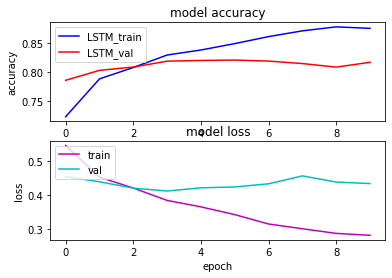

In [28]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [29]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
print(scores)
y_pred_1d = [decode_sentiment(score) for score in scores]

2103/2103 [==============================] - 8s 4ms/sample
[[0.3653754  0.508828   0.14803734]
 [0.21849456 0.7244437  0.06948945]
 [0.20001486 0.77167296 0.01593834]
 ...
 [0.00723511 0.99208343 0.00135356]
 [0.46056703 0.47778586 0.04029682]
 [0.24568105 0.02614996 0.7211149 ]]
0.508828 1
---
0.7244437 1
---
0.77167296 1
---
0.95879984 -1
---
0.92849123 1
---
0.61699903 -1
---
0.7104194 0
---
0.7072658 0
---
0.87985337 1
---
0.68470997 -1
---
0.91408324 -1
---
0.6181692 1
---
0.52552813 1
---
0.67127323 1
---
0.87615955 0
---
0.66042876 0
---
0.7411982 -1
---
0.97231865 0
---
0.96444625 1
---
0.915461 1
---
0.5065943 0
---
0.7792466 1
---
0.8939904 0
---
0.7361847 0
---
0.8595226 1
---
0.97597945 1
---
0.9224732 -1
---
0.87527764 0
---
0.582941 1
---
0.93166065 1
---
0.7385917 -1
---
0.42612743 1
---
0.91645885 -1
---
0.82359624 1
---
0.9576527 1
---
0.749525 -1
---
0.78981483 0
---
0.9708192 -1
---
0.6888772 -1
---
0.77464944 1
---
0.67989266 1
---
0.72776484 0
---
0.98383045 1
---


### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [30]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

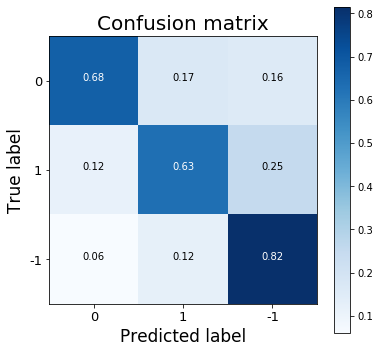

In [31]:
cnf_matrix = confusion_matrix(test_data['Polarity'].to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data['Polarity'].unique(), title="Confusion matrix")
plt.show()

### Classification Scores

In [32]:
print(classification_report(list(test_data['Polarity']), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.73      0.68      0.70       530
           0       0.69      0.63      0.66       697
           1       0.73      0.82      0.77       876

    accuracy                           0.72      2103
   macro avg       0.72      0.71      0.71      2103
weighted avg       0.72      0.72      0.72      2103



It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.

<h3>Some of the resource and people who help me learn some concepts</h3>
<font color='#008080'>
    <ul>
        <li> <b>Andrew NG's Seqence Model Course</b> at <a href="https://www.coursera.org/learn/nlp-sequence-models"> Coursera</a> </li>
    
<li> <b>Andrej Karpathy's Blog</b> on <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Effectiveness of RNN</a></li>

<li> <b>Intuitive Understanding of GloVe Embedding</b> on <a href="https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010">TDS</a></li>

<li> <b>Keras tutorial on Word Embedding</b> <a href="https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html"> here</a></li>

</ul>
</font>

> <font color='#696969'>I got to say like you, I am still at learning phase in terms of NLP. I have got lot to learn in future. I found that writing this notebook even though it is done by lot of people before me helps me with a deeper and complete understanding our the concepts that I am learning. Kaggle has been a amazing place to learn from and contribute to community of Data Science Aspirants.</font>

<h2><font color='red'> If you find this notebook usefull kindly UPVOTE this notebook. I am new to writting notebooks hope that would really encourage me to write and learn more.</font></h2>

<h5>Thanks in Advance. Have a nice day. Learn more and Happy Kaggle</h5>

In [33]:
# initialize the number of categories to plot
N = 3

# separate out the counts for preddeg and highdeg
#preddeg_counts = df.preddeg.value_counts(sort = False).values
#highdeg_counts = df.highdeg.value_counts(sort = False).values

preddeg_counts = [72, 70, 73]
highdeg_counts = [28, 30, 27]

# get the locations to plot bars at and specify the width of each bar
ind = np.arange(N)
width = 0.35

# specify the color palettes and make subplots for each preddeg and highdeg
c1, c2 = sb.color_palette()[0], sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (8,5))

# plot
rects1 = ax.bar(ind, preddeg_counts, width, color = c1)
rects2 = ax.bar(ind + width, highdeg_counts, width, color = c2)

# specify the tick locations
ax.set_xticks(ind + width / 2)

# label
ax.set_xticklabels(("Certificate", "Associate's", "Bachelor's", "Graduate's"), fontsize = 11)
ax.legend( (rects1[0], rects2[0]), ('Predominant Award', 'Highest Award'), fontsize = 12 )
plt.title('Distribution of Degrees', fontsize = 14)
plt.xlabel('Award', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

NameError: name 'sb' is not defined